# CS381 Data Analytics Final Project

### Due on 5/13/2020 23:59 pm

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [118]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Dataset is based on an census income data
https://archive.ics.uci.edu/ml/datasets/census+income


Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 


Attribute Information:

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year

* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



### However, I have modified the dataset and so you will need to load the dataset by reading a csv file I provided. In particular, I changed 50K to 80K just to reflect the inflation 

In [119]:
df = pd.read_csv("adult_income_modified.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=80K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=80K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=80K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=80K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=80K


### Your task is to build a model that can predict whether a people will earn <= 80K or > 80K

* Use any one of the models (Logistic, SVM, Naive Bayes, Decision Tree and Random Forecast) that we have covered in class.
* Do not use any models that we have not covered in class.
*
* The best performance model will have an extra 5 points, but the whole project will still be capped at 20 points for the whole final project



### Make sure your work include the following steps

* EDA (chekcing missing values, removing outliers)
* performed basic exploration of relationship, with plots and graphs
* separated data set into training and testing
* setup dummy variables to take care categorical variables
* normalize numerical features if needed
* tried at least two models and checked their model performance
* performed cross-validations


First change the target variable salary to 0 and 1

In [120]:
df['salary'] = df['salary'].apply(lambda x: 0 if x == '<=80K' else 1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


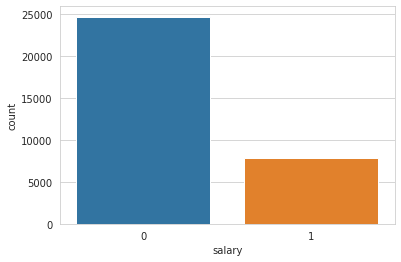

In [121]:
sns.countplot(df['salary'])

In [122]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
count,32571.000000,3.257100e+04,32571.000000,32571.000000,32571.000000,32571.000000,32571.000000
mean,38.599153,1.898091e+05,10.080747,1077.317982,87.435357,40.452151,0.240766
std,13.744795,1.055927e+05,2.572484,7384.182377,403.204587,12.441330,0.427555
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178215e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783830e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.371095e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,250.000000,1.484705e+06,16.000000,99999.000000,4356.000000,202.000000,1.000000


### Good Luck !!!

Show all your work below

### EDA

In [123]:
print(df.shape)
df.dropna(inplace=True)
df.isnull().any()

(32571, 15)


age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
salary            False
dtype: bool

In [124]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [125]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.90)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

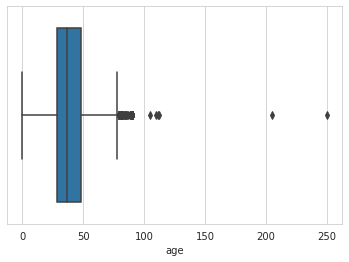

In [126]:
sns.boxplot(df["age"])

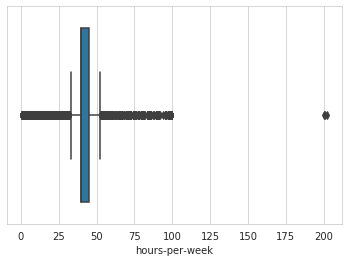

In [127]:
sns.boxplot(df['hours-per-week'])

In [128]:
df = remove_outlier(df, 'age')
df = remove_outlier(df, 'hours-per-week')

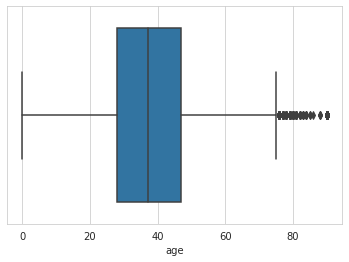

In [129]:
sns.boxplot(df["age"])

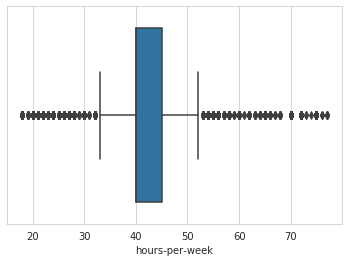

In [130]:
sns.boxplot(df['hours-per-week'])

### Basic Exploration of Relationship, with plots and graphs

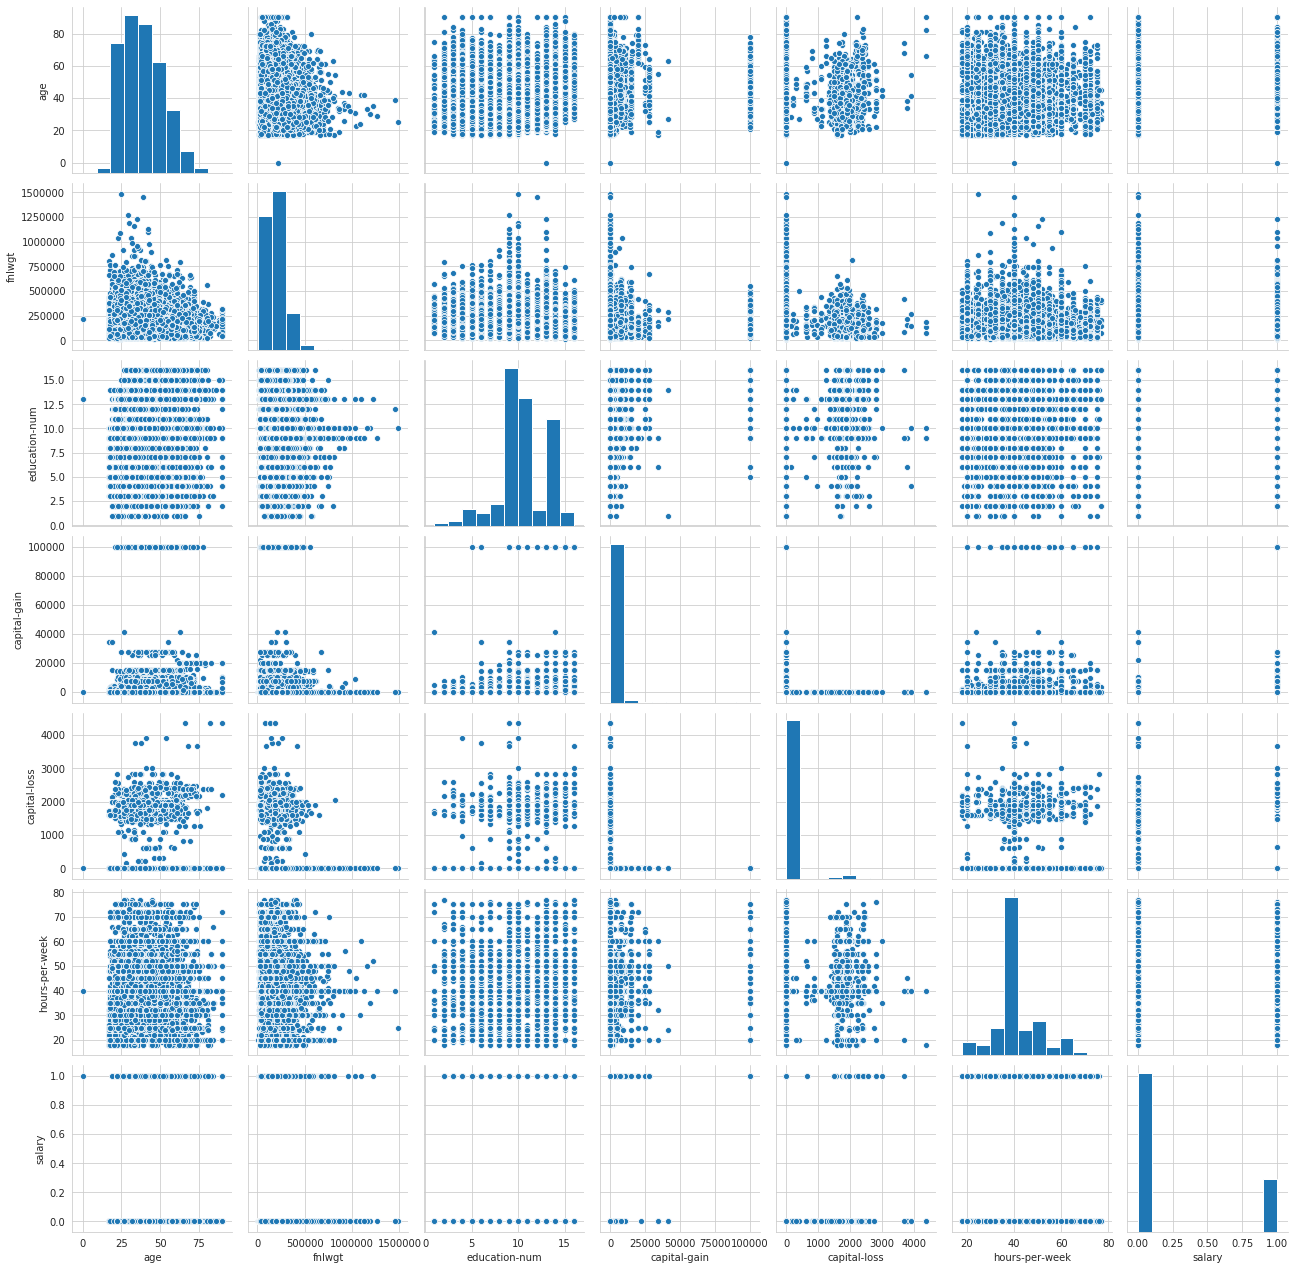

In [131]:
sns.pairplot(df)

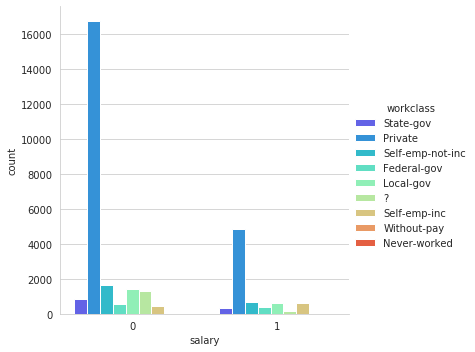

In [139]:
sns.set_style('whitegrid')
sns.factorplot('salary', kind='count', hue='workclass', data=df,palette='rainbow')

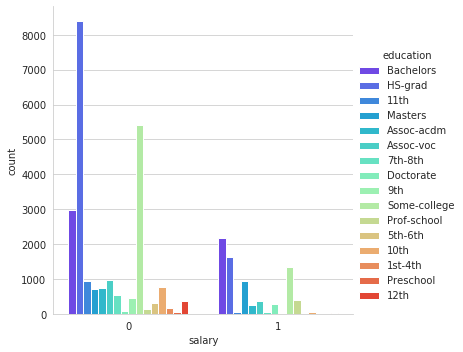

In [140]:
sns.factorplot('salary', kind='count', hue='education', data=df,palette='rainbow')

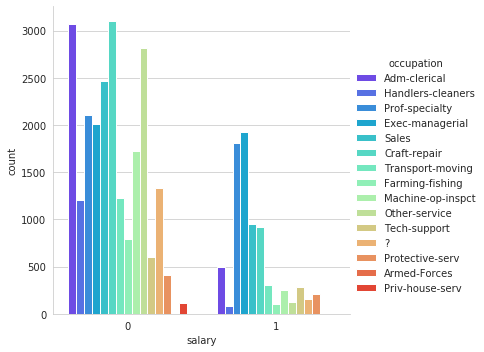

In [141]:
sns.factorplot('salary', kind='count', hue='occupation', data=df,palette='rainbow')

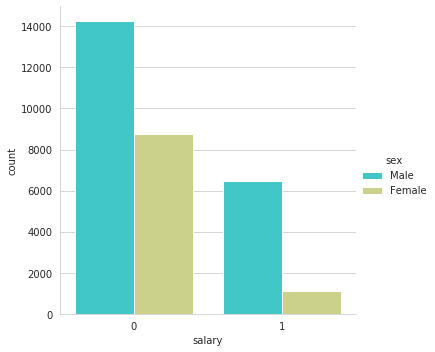

In [143]:
sns.factorplot('salary', kind='count', hue='sex', data=df,palette='rainbow')